In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import OrderedDict

In [4]:
#Load dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [6]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/2015,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/2014,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/2012,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/2009,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
test.head(5 )

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/2007,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/1958,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/1997,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/2010,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/2005,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [9]:
train.nunique()

id                       3000
belongs_to_collection     422
budget                    406
genres                    872
homepage                  941
imdb_id                  3000
original_language          36
original_title           2975
overview                 2992
popularity               2999
poster_path              2999
production_companies     2383
production_countries      321
release_date             2398
runtime                   139
spoken_languages          401
status                      2
tagline                  2400
title                    2969
Keywords                 2648
cast                     2975
crew                     2984
revenue                  2850
dtype: int64

In [10]:
train.dropna(inplace=True)
train.drop_duplicates(inplace=True)

In [11]:
#Exploratory data analysis
train['revenue'].describe()

count    2.030000e+02
mean     3.043090e+08
std      3.202736e+08
min      1.000000e+01
25%      5.617515e+07
50%      1.911859e+08
75%      4.366386e+08
max      1.519558e+09
Name: revenue, dtype: float64

In [12]:
train['budget'].describe()

count    2.030000e+02
mean     7.108022e+07
std      7.359483e+07
min      0.000000e+00
25%      1.050000e+07
50%      4.800000e+07
75%      1.165000e+08
max      3.800000e+08
Name: budget, dtype: float64

<Axes: xlabel='budget', ylabel='revenue'>

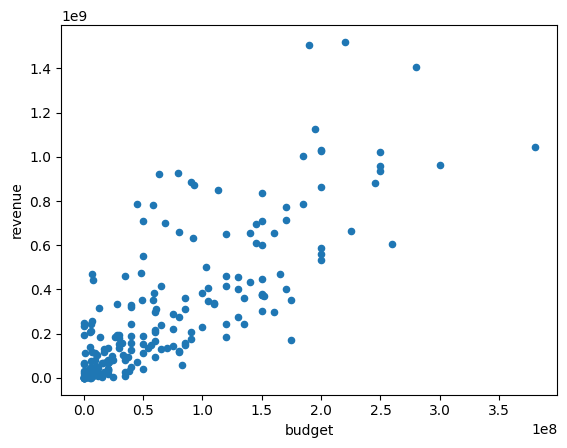

In [13]:
train.plot.scatter('budget','revenue')

In [14]:
# top ten movies with the costliest budgets.
budget = train.sort_values(by='budget', ascending=False)
print("Top ten movies with costliest budgets")
print((budget.loc[:, "budget"]).head(10))

Top ten movies with costliest budgets
2135    380000000
2209    300000000
2770    280000000
1630    260000000
2532    250000000
961     250000000
666     250000000
2737    245000000
2357    225000000
1126    220000000
Name: budget, dtype: int64


In [16]:
# Top ten movies with the highet revenue
revenue = train.sort_values(by='revenue', ascending=False)
print("Top ten movies with the highet revenue\n")
print((revenue.loc[:,"revenue"]).head(10))

Top ten movies with the highet revenue

1126    1519557910
1761    1506249360
2770    1405403694
2322    1123746996
2135    1045713802
2562    1028570889
881     1025491110
2532    1021103568
1673    1004558444
2209     961000000
Name: revenue, dtype: int64


In [17]:
#first removing features which are irrelevant for our prediction
train.drop(['imdb_id','poster_path'],axis=1,inplace=True)
test.drop(['imdb_id','poster_path'],axis=1,inplace=True)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


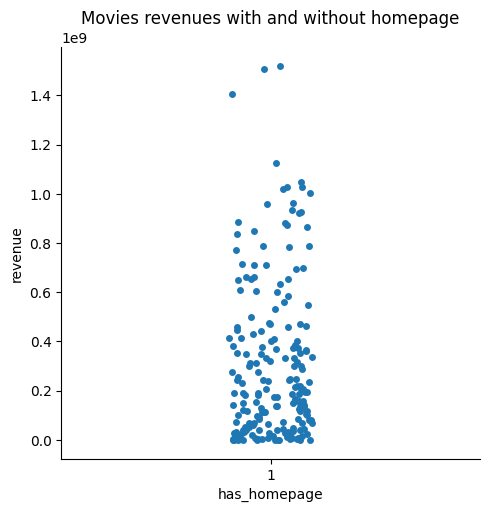

In [18]:
#we have a lot of null values for homepage
#Converting homepage as binary
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

#Homepage v/s Revenue
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Movies revenues with and without homepage');

In [19]:
train = train.drop(['homepage'],axis =1)
test = test.drop(['homepage'],axis =1)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


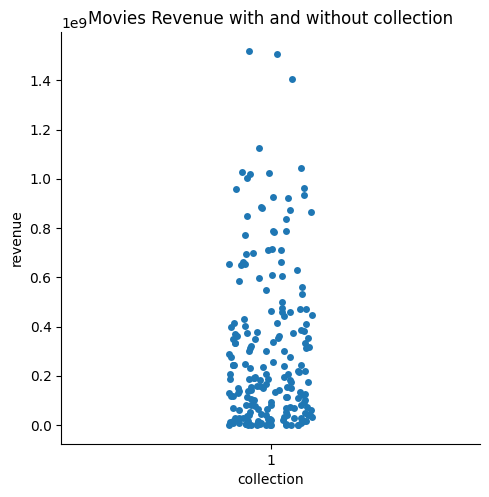

In [20]:
#Converting collections as binary
train['collection'] = 0
train.loc[train['belongs_to_collection'].isnull() == False, 'collection'] = 1
test['collection'] = 0
test.loc[test['belongs_to_collection'].isnull() == False, 'collection'] = 1

#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=train);
plt.title('Movies Revenue with and without collection');

In [21]:
#Collection too increaes the revenue
train=train.drop(['belongs_to_collection'],axis =1)
test=test.drop(['belongs_to_collection'],axis =1)

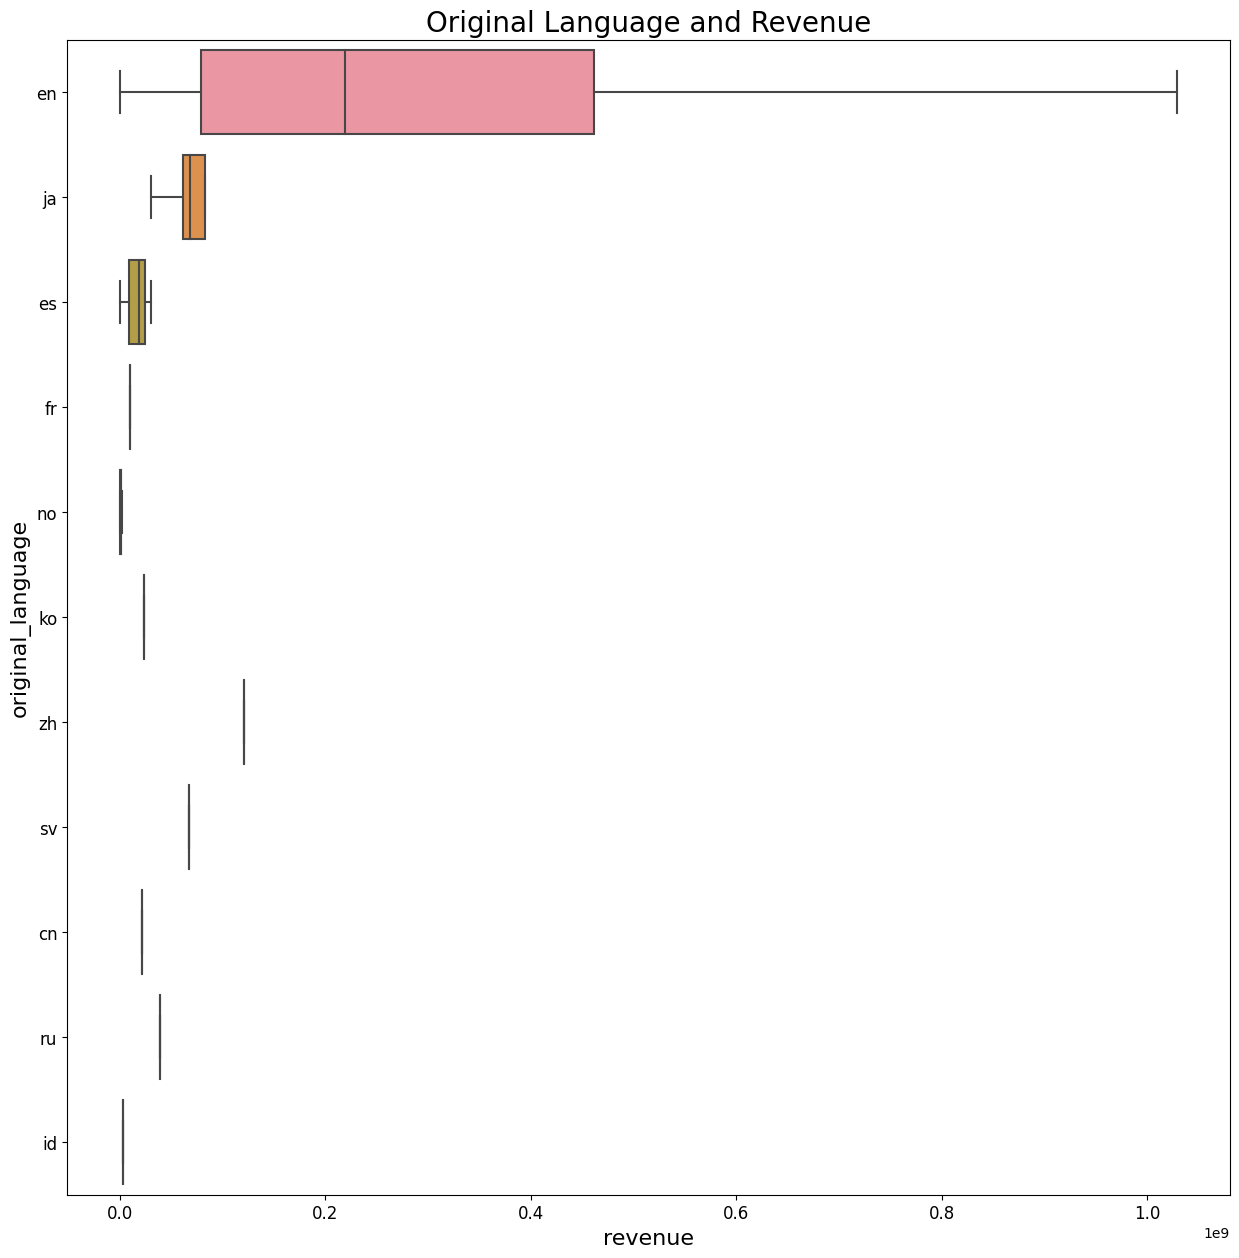

In [22]:
#Lanaguage
#Find the Most Profitable Movie languages wise
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Original Language and Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Original Language', fontsize=16)
sns.boxplot(ax=ax, x='revenue', y='original_language', data=train, showfliers=False, orient='h')
plt.show()

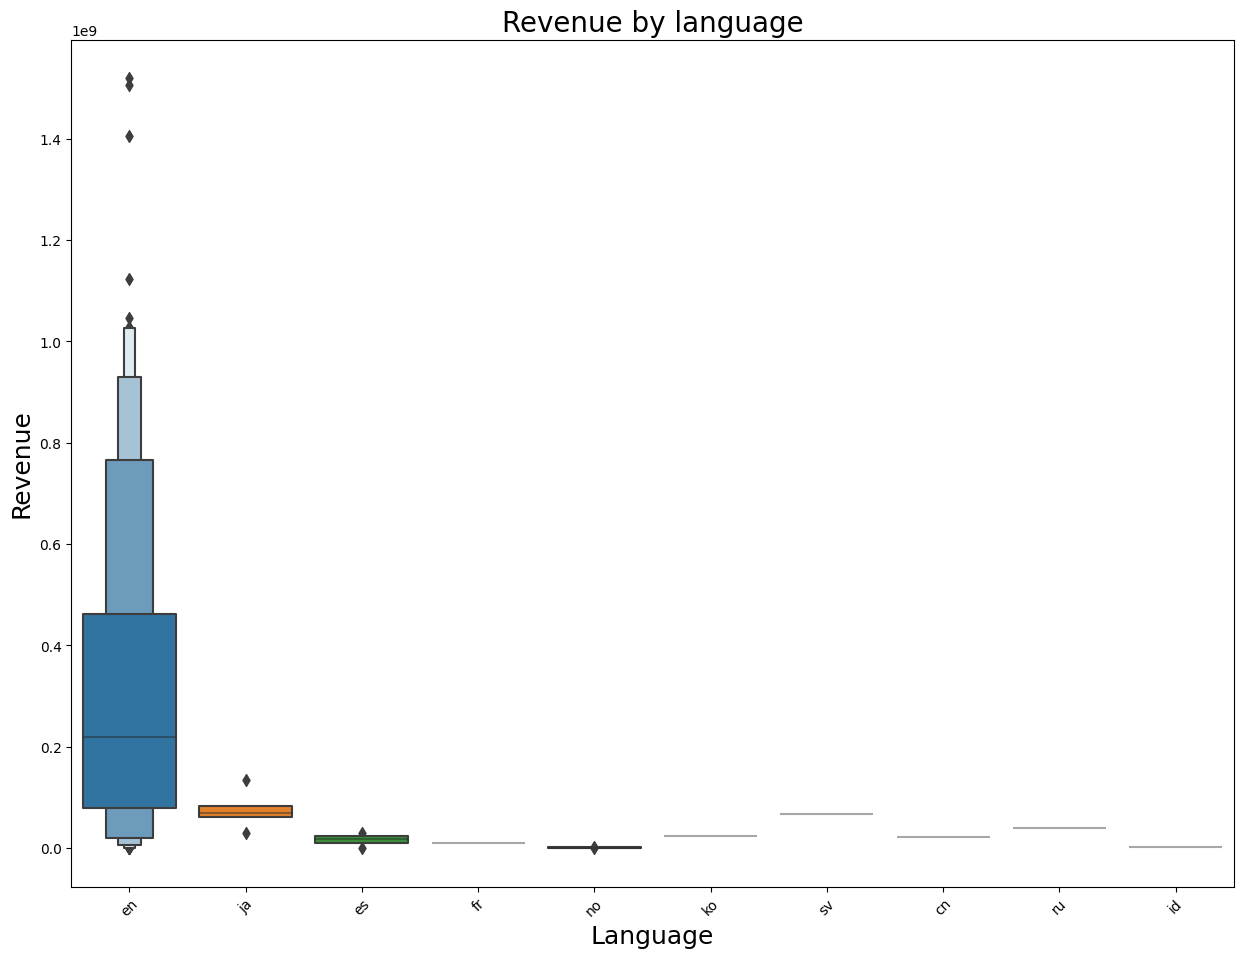

In [23]:
#Some languages seem to attract greater audiences than others and end up generating more revenue. For example, the highest revenue movies are in English, Chinese and Turkish. ('en', 'zh' and 'tr'). Hindi ('hi') and Japanese ('ja') are not far behind.

#How language contributes to revenue
plt.figure(figsize=(15,11)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='original_language', y='revenue',
                   data=train[(train['original_language'].isin((train['original_language'].sort_values().value_counts()[:10].index.values)))])
g1.set_title("Revenue by language", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel
plt.show()

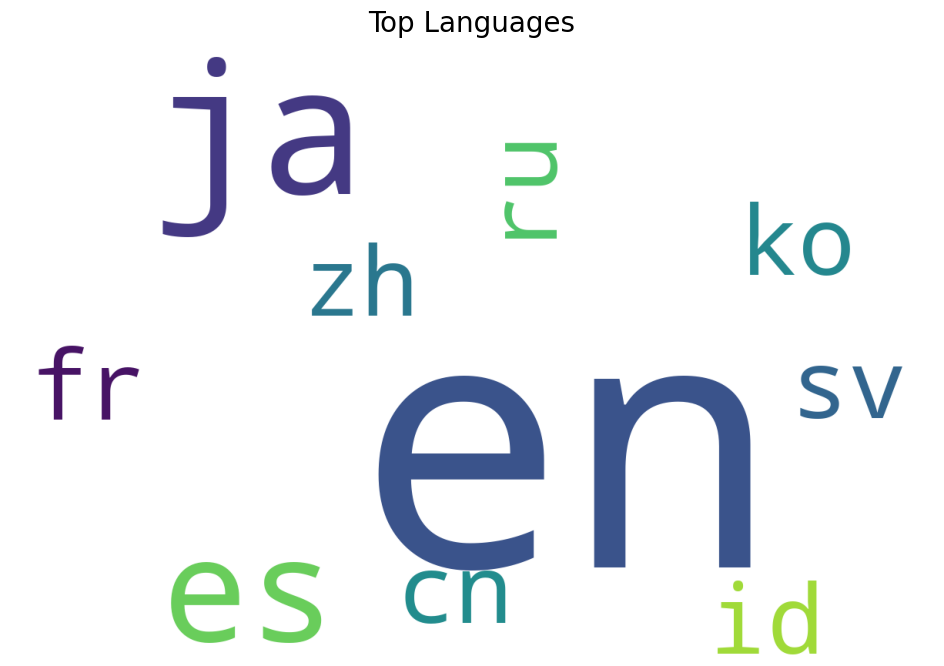

In [24]:
#Most Common Languages
plt.figure(figsize = (12, 8))
text = ' '.join(train['original_language'])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Languages', fontsize=20)
plt.axis("off")
plt.show()

In [25]:
#Taking only en and zh into consideration as they are the highest grossing
train['original_language'] = train['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))
test['original_language'] = test['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))

In [26]:
# Genre
# Visualize the relationship between the genre and revenue of the movie
genres = []
repeated_revenues = []

# Iterate through the rows of the DataFrame
for index, row in train.iterrows():
    if row['genres'] == row['genres']:
        movie_genres = [genre['name'] for genre in eval(row['genres'])]
        genres.extend(movie_genres)
        repeated_revenues.extend([row['revenue']] * len(movie_genres))
genre_df = pd.DataFrame({'genre': genres, 'revenue': repeated_revenues})

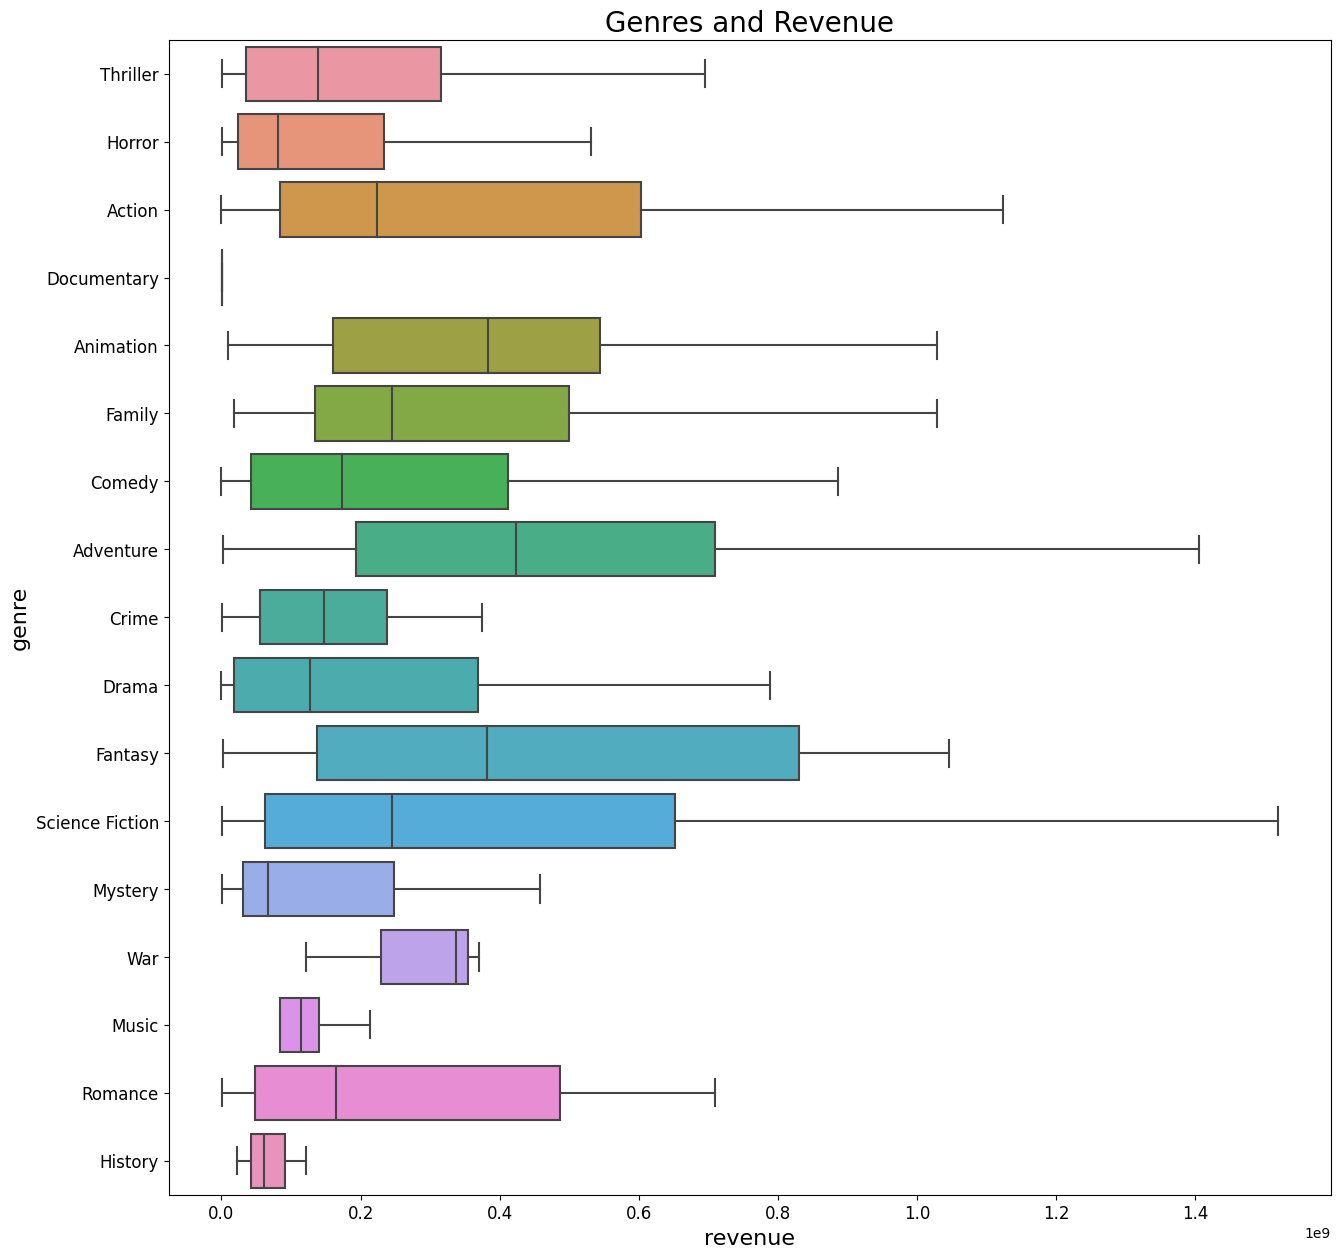

In [27]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h')
plt.show()

In [28]:
#adding number of genres for each movie
genres_count=[]
for i in train['genres']:
    if(not(pd.isnull(i))):

        genres_count.append(len(eval(i)))

    else:
        genres_count.append(0)
train['num_genres'] = genres_count


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


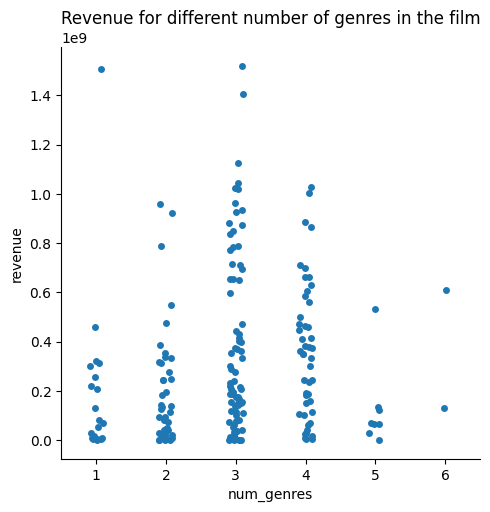

In [29]:
#Genres v/s revenue
sns.catplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');

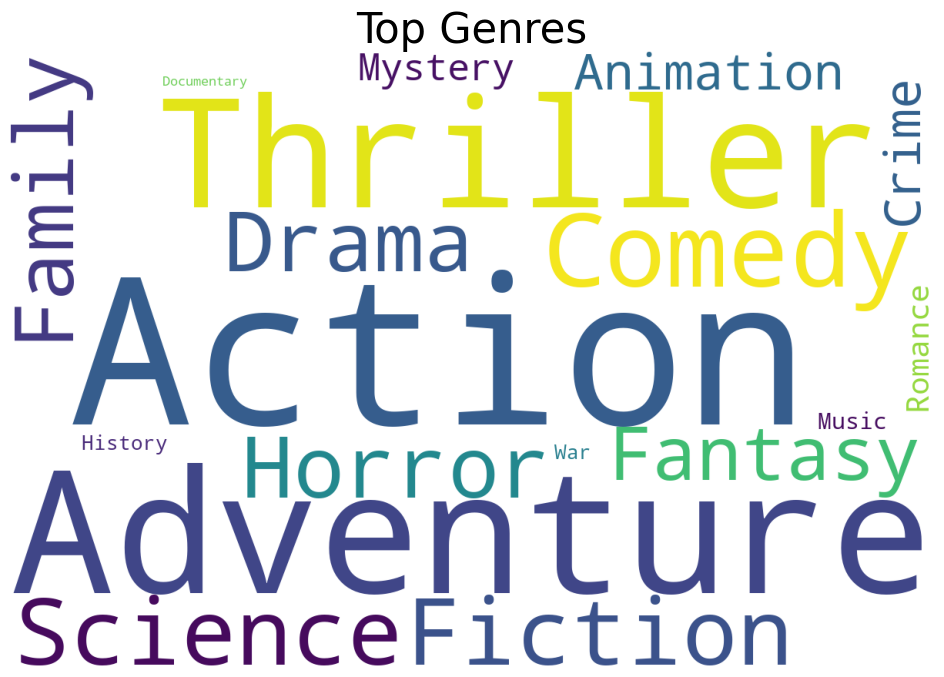

In [30]:
plt.figure(figsize = (12, 8))
text = ' '.join(genres)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=30)
plt.axis("off")
plt.show()

In [31]:
#Adding genres count for test data
genres_count_test=[]
for i in test['genres']:
    if(not(pd.isnull(i))):

        genres_count_test.append(len(eval(i)))

    else:
        genres_count_test.append(0)
test['num_genres'] = genres_count_test

In [32]:
#Dropping genres
train.drop(['genres'],axis=1, inplace = True)
test.drop(['genres'],axis=1, inplace = True)

In [33]:
#Adding production_companies count for data
prod_comp_count=[]
for i in train['production_companies']:
    if(not(pd.isnull(i))):

        prod_comp_count.append(len(eval(i)))

    else:
        prod_comp_count.append(0)
train['num_prod_companies'] = prod_comp_count

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Revenue for different number of production companies in the film')

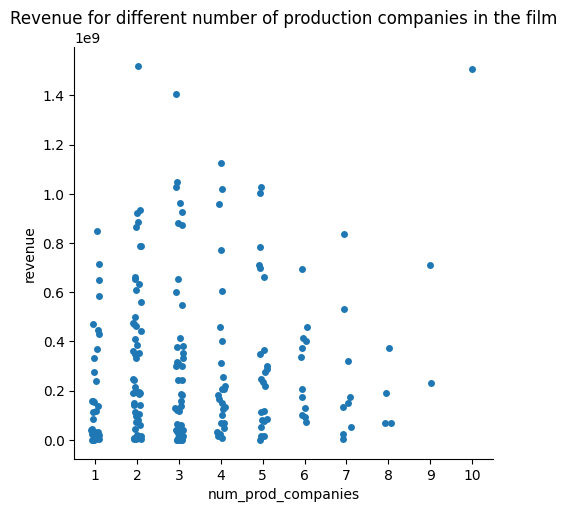

In [34]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=train)
plt.title('Revenue for different number of production companies in the film')

In [35]:
#Adding production_companies count for  test data
prod_comp_count_test=[]
for i in test['production_companies']:
    if(not(pd.isnull(i))):

        prod_comp_count_test.append(len(eval(i)))

    else:
        prod_comp_count_test.append(0)
test['num_prod_companies'] = prod_comp_count_test

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


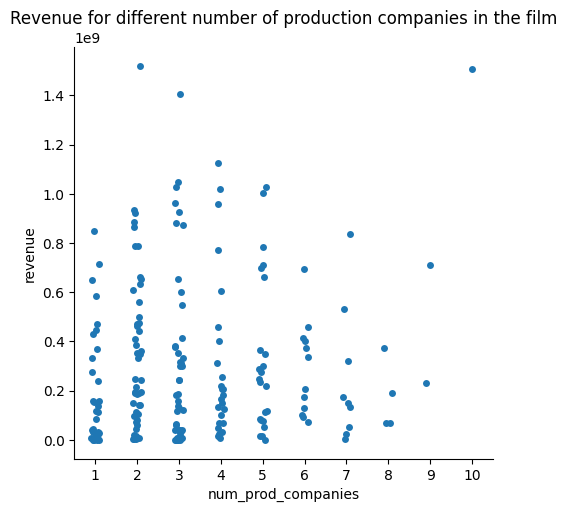

In [36]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=train);
plt.title('Revenue for different number of production companies in the film');

In [37]:
#Dropping production_companies
train.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)


In [38]:
#Adding production_countries count for  data
prod_coun_count=[]
for i in train['production_countries']:
    if(not(pd.isnull(i))):

        prod_coun_count.append(len(eval(i)))

    else:
        prod_coun_count.append(0)
train['num_prod_countries'] = prod_coun_count

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


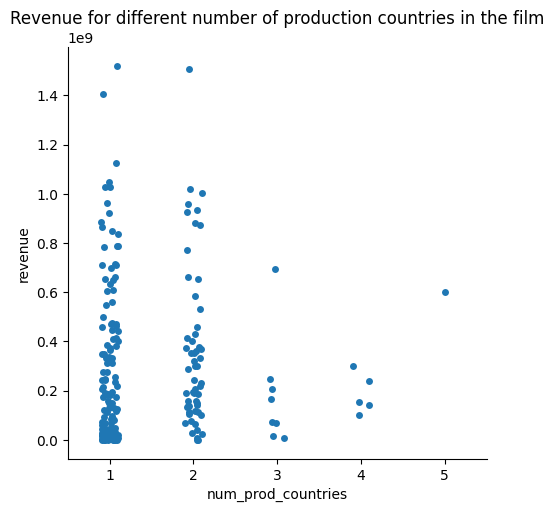

In [39]:
#number of prod countries vs revenue
sns.catplot(x='num_prod_countries', y='revenue', data=train);
plt.title('Revenue for different number of production countries in the film');


In [40]:
#Adding production_countries count for  test data
prod_coun_count_test=[]
for i in test['production_countries']:
    if(not(pd.isnull(i))):

        prod_coun_count_test.append(len(eval(i)))

    else:
        prod_coun_count_test.append(0)
test['num_prod_countries'] = prod_coun_count_test

In [41]:
#Dropping production_countries
train.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


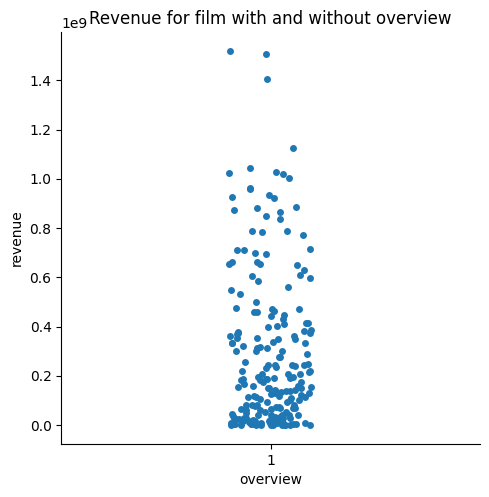

In [42]:
#handling overview
#mapping overview present to 1 and nulls to 0
train['overview']=train['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['overview']=test['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
sns.catplot(x='overview', y='revenue', data=train);
plt.title('Revenue for film with and without overview');

In [43]:
train = train.drop(['overview'],axis=1)
test = test.drop(['overview'],axis=1)

In [44]:
#cast
#Adding cast count for  data
total_cast=[]
for i in train['cast']:
    if(not(pd.isnull(i))):

        total_cast.append(len(eval(i)))

    else:
        total_cast.append(0)
train['cast_count'] = total_cast

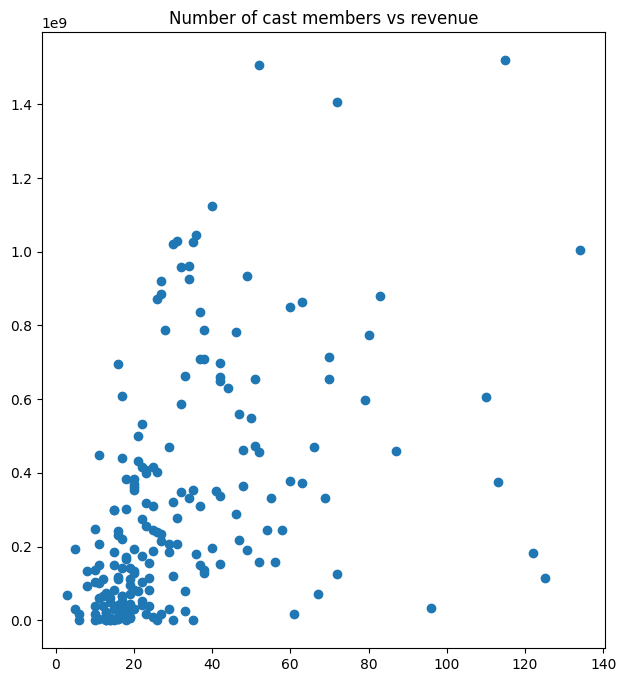

In [45]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['cast_count'], train['revenue'])
plt.title('Number of cast members vs revenue');

In [46]:
#cast
#Adding cast count for  test data
total_cast=[]
for i in test['cast']:
    if(not(pd.isnull(i))):

        total_cast.append(len(eval(i)))

    else:
        total_cast.append(0)
test['cast_count'] = total_cast

In [47]:
#Dropping cast
train = train.drop(['cast'],axis=1)
test = test.drop(['cast'],axis=1)

In [48]:
#crew
total_crew=[]
for i in train['crew']:
    if(not(pd.isnull(i))):

        total_crew.append(len(eval(i)))

    else:
        total_crew.append(0)
train['crew_count'] = total_crew

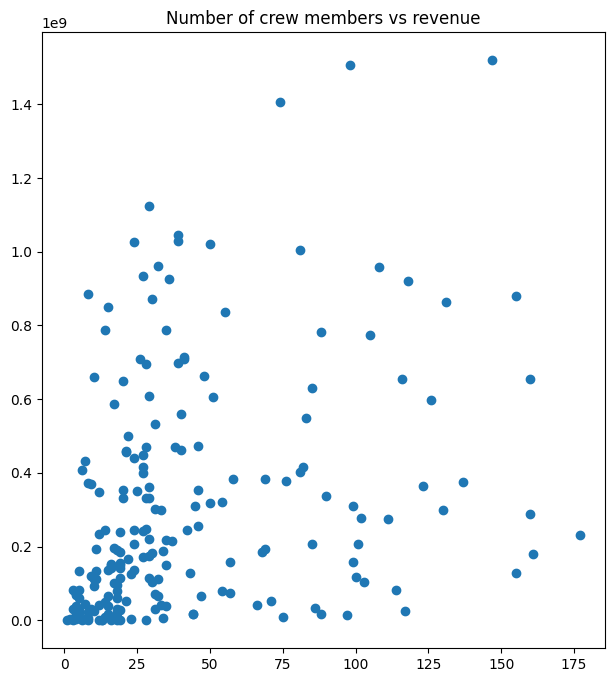

In [49]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['crew_count'], train['revenue'])
plt.title('Number of crew members vs revenue');

In [50]:
#Adding crew count for  test data
total_crew=[]
for i in test['crew']:
    if(not(pd.isnull(i))):

        total_crew.append(len(eval(i)))

    else:
        total_crew.append(0)
test['crew_count'] = total_crew

In [51]:
#Dropping crew
train = train.drop(['crew'],axis=1)
test = test.drop(['crew'],axis=1)

In [52]:
#Dropping original_title
train = train.drop(['original_title'],axis=1)
test = test.drop(['original_title'],axis=1)

<Axes: >

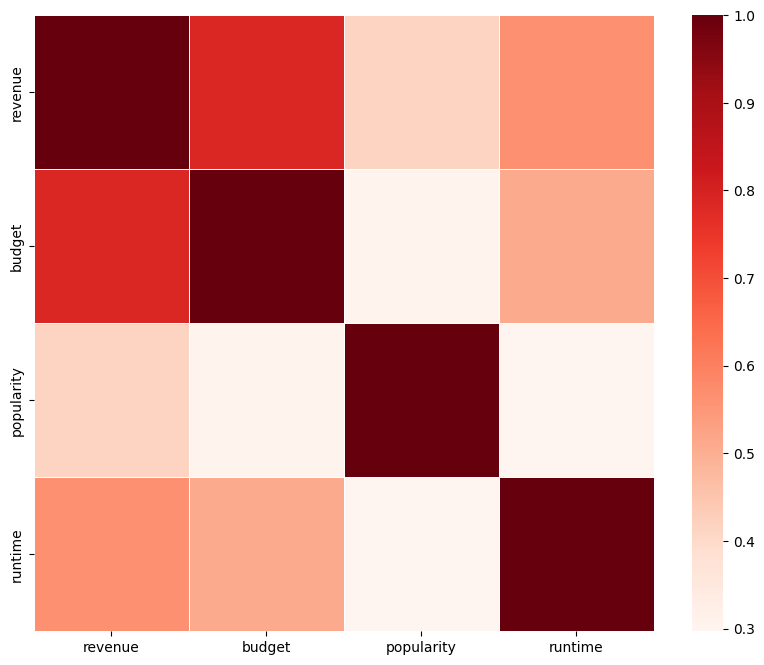

In [53]:
# Check correlation between variables
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = train[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

<Axes: xlabel='budget', ylabel='revenue'>

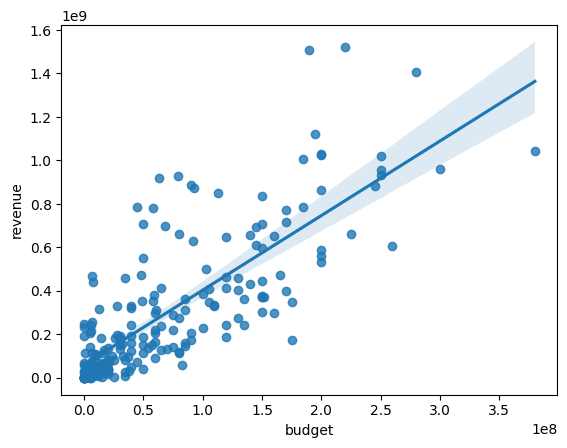

In [54]:
#budget and revenue are highly correlated
sns.regplot(x="budget", y="revenue", data = train)

In [55]:
#Check how revenue depends of day
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

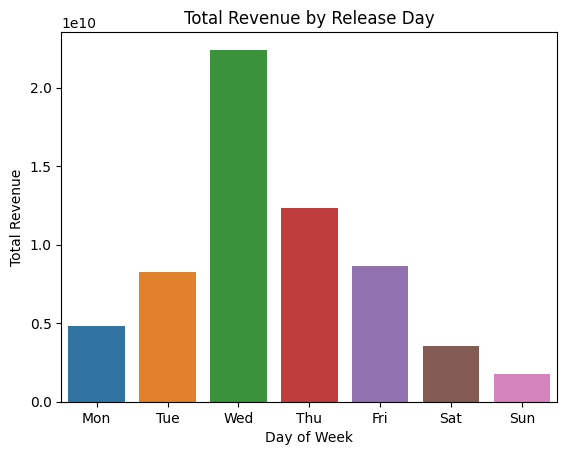

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train is your dataframe containing the 'release_date' and 'revenue' columns

train['release_date'] = pd.to_datetime(train['release_date'])

# Count occurrences of each release day
release_day_counts = train['release_date'].value_counts().sort_index()

# Group by day of the week and calculate total revenue for each day
release_day_revenue = train.groupby(train['release_date'].dt.dayofweek)['revenue'].sum()

# Create the bar plot using seaborn
sns.barplot(x=release_day_revenue.index, y=release_day_revenue)
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Release Day')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [57]:
#adding day feature to the data

train['release_day'] = train['release_date'].dt.dayofweek
test['release_day'] = test['release_date'].dt.dayofweek

In [58]:
#filling nulls in test
test['release_day'] = test['release_day'].fillna(0)

In [59]:
train.drop(['release_date'],axis=1,inplace=True)
test.drop(['release_date'],axis=1,inplace=True)

In [60]:
#status
print("train data")
print(train['status'].value_counts())
print("test data")
test['status'].value_counts()

train data
status
Released    203
Name: count, dtype: int64
test data


status
Released           4389
Post Production       5
Rumored               2
Name: count, dtype: int64

In [61]:
#Feature is irrelevant hence dropping
train.drop(['status'],axis=1,inplace =True)
test.drop(['status'],axis=1,inplace =True)

In [62]:
#keywords
Keywords_count=[]
for i in train['Keywords']:
    if(not(pd.isnull(i))):

        Keywords_count.append(len(eval(i)))

    else:
        Keywords_count.append(0)
train['Keywords_count'] = Keywords_count

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


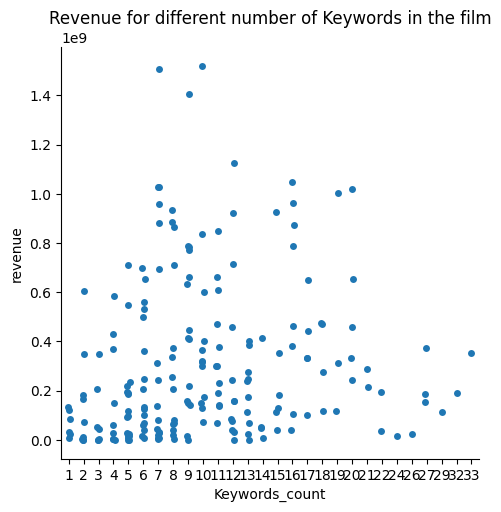

In [63]:
#number of prod countries vs revenue
sns.catplot(x='Keywords_count', y='revenue', data=train);
plt.title('Revenue for different number of Keywords in the film');

In [64]:
Keywords_count=[]
for i in test['Keywords']:
    if(not(pd.isnull(i))):

        Keywords_count.append(len(eval(i)))

    else:
        Keywords_count.append(0)
test['Keywords_count'] = Keywords_count

In [65]:
#Dropping title and keywords
train = train.drop(['Keywords'],axis=1)
train = train.drop(['title'],axis=1)
test = test.drop(['Keywords'],axis=1)
test = test.drop(['title'],axis=1)


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


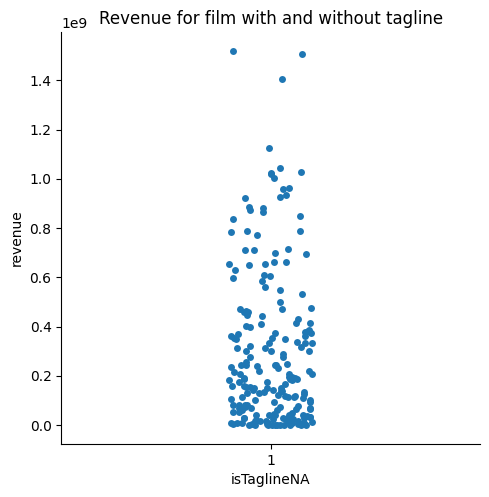

In [66]:
#Tagline
train['isTaglineNA'] = 0
train.loc[train['tagline'].isnull() == False, 'isTaglineNA'] = 1
test['isTaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'isTaglineNA'] = 1

#Homepage v/s Revenue
sns.catplot(x='isTaglineNA', y='revenue', data = train);
plt.title('Revenue for film with and without tagline');

In [67]:
train.drop(['tagline'],axis=1,inplace =True)
test.drop(['tagline'],axis=1,inplace =True)

In [68]:
#runtime has 2 nulls; setting it to the mean
#filling nulls in test
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(test['runtime'].mean())

In [69]:
#adding number of spoken languages for each movie
spoken_count=[]
for i in train['spoken_languages']:
    if(not(pd.isnull(i))):

        spoken_count.append(len(eval(i)))

    else:
        spoken_count.append(0)
train['spoken_count'] = spoken_count


spoken_count_test=[]
for i in test['spoken_languages']:
    if(not(pd.isnull(i))):

        spoken_count_test.append(len(eval(i)))

    else:
        spoken_count_test.append(0)
test['spoken_count'] = spoken_count_test

In [70]:
#dropping spoken_languages
train.drop(['spoken_languages'],axis=1,inplace=True)
test.drop(['spoken_languages'],axis=1,inplace=True)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 22 to 2984
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  203 non-null    int64  
 1   budget              203 non-null    int64  
 2   original_language   203 non-null    int64  
 3   popularity          203 non-null    float64
 4   runtime             203 non-null    float64
 5   revenue             203 non-null    int64  
 6   has_homepage        203 non-null    int64  
 7   collection          203 non-null    int64  
 8   num_genres          203 non-null    int64  
 9   num_prod_companies  203 non-null    int64  
 10  num_prod_countries  203 non-null    int64  
 11  cast_count          203 non-null    int64  
 12  crew_count          203 non-null    int64  
 13  release_day         203 non-null    int32  
 14  Keywords_count      203 non-null    int64  
 15  isTaglineNA         203 non-null    int64  
 16  spoken_coun

In [72]:
train.head()

,id,budget,original_language,popularity,runtime,revenue,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
22,23,0,1,7.820787,116.0,100345,1,1,2,3,1,30,19,5,13,1,1
40,41,0,1,2.941626,118.0,163000,1,1,2,1,1,6,1,2,2,1,1
46,47,80000000,1,16.646029,91.0,660940780,1,1,4,2,1,42,10,3,11,1,1
60,61,150000000,1,23.065078,144.0,599045960,1,1,3,3,5,79,126,1,10,1,2
69,70,85000000,1,2.238808,104.0,158468292,1,1,4,1,2,56,57,5,9,1,2


In [73]:
test.head()

,id,budget,original_language,popularity,runtime,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
0,3001,0,0,3.851534,90.0,1,1,4,0,2,7,2,5.0,2,1,2
1,3002,88000,1,3.559789,65.0,0,0,2,1,1,10,8,0.0,8,1,1
2,3003,0,1,8.085194,100.0,0,0,2,3,1,9,10,4.0,4,1,1
3,3004,6800000,0,8.596012,130.0,1,0,3,3,2,23,69,5.0,15,1,3
4,3005,2000000,1,3.217680,92.0,0,0,2,0,1,4,14,4.0,4,1,1


In [74]:
print(train.shape)
print(test.shape)

(203, 17)
(4398, 16)


In [75]:
cols = [col for col in train.columns if col != 'revenue']
X_test = test[cols]

In [76]:
X_test['budget'] = np.log1p(X_test['budget'])

In [79]:
y_pred = regr.predict(X_test)

In [80]:
y_pred_transformed = np.expm1(y_pred)

C:\Users\basir\AppData\Local\Temp\ipykernel_10648\493537556.py:1: RuntimeWarning: overflow encountered in expm1
  y_pred_transformed = np.expm1(y_pred)


In [84]:
train['budget'] = np.log1p(train['budget'])
test['budget'] = np.log1p(test['budget'])

In [82]:
# Prepare dataset for train the Model
y= train['revenue'].values
cols = [col for col in train.columns if col not in ['revenue', 'id']]
X= train[cols].values
y = np.log1p(y)

In [116]:
# Traning the model
# 1.Linear Regression
# 2.Random Forest Regression

In [85]:
# method ---1
# Create regression object
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
import pandas as pd

# Assuming 'new_films' is your original DataFrame containing the data

# Clean the data by removing rows with missing values in 'budget' or 'revenue'
train.dropna(subset=['budget', 'revenue'], inplace=True)

# Extract 'budget' and 'revenue' columns from 'new_films' and assign them to 'X' and 'y'
X = train[['budget']]
y = train['revenue']
# Find the best-fit line
regression.fit(X, y)
regression.intercept_
regression.coef_
# R-squared
regression.score(X, y)
X = pd.DataFrame(train, columns=['budget'])
y = pd.DataFrame(train, columns=['revenue'])
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [27907569.0258115]
The intercept is: -148352910.3543461
The r-squared is: 0.166946225233496


In [86]:
# Method - 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from math import expm1
X = train.drop("revenue", axis=1)
Y = train["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
regr = RandomForestRegressor()  
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared:", r2)



R-squared: 0.6645714587748043


In [87]:
#method--3 both LLinear Regression and Random Forest
X = train.drop("revenue",axis=1)
Y = train["revenue"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import *
models=[LinearRegression(),RandomForestRegressor()]
model_names=["LinearRegression","RandomForestRegressor"]
r_2=[]
accuracy = []
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    accuracy.append((model.score(X_test,y_test))*100)
d=pd.DataFrame({'Modelling Name':model_names,"R_2":r_2,"Accuracy":accuracy})

In [90]:
d

,Modelling Name,R_2,Accuracy
0,LinearRegression,0.532890,53.289005
1,RandomForestRegressor,0.592634,59.263400


In [91]:
# Testing the model
cols = [col for col in test.columns if col != 'id']
X_test = test[cols]
X = train.drop(["revenue", "id"], axis=1) 
X_test = test.drop("id", axis=1)  
regr.fit(X, Y)
y_pred = regr.predict(X_test)

In [92]:
y_pred_transformed = np.expm1(y_pred)

# Create a DataFrame for the submission
submission_df = pd.DataFrame({'id': test['id'], 'revenue': y_pred_transformed})
# Save submission to CSV file
submission_df.to_csv('submission_RF.csv', index=False)

C:\Users\basir\AppData\Local\Temp\ipykernel_10648\3513229814.py:1: RuntimeWarning: overflow encountered in expm1
  y_pred_transformed = np.expm1(y_pred)


In [93]:
import pickle
from sklearn.linear_model import LinearRegression

In [98]:
import pickle
filename='submission_RF.csv'
pickle.dump(model,open(filename,'wb'))

In [99]:
load_model=pickle.load(open(filename,'rb'))